In [ ]:
import tensorflow as tf
print("✅ TensorFlow version:", tf.__version__)
print("✅ GPU available:", tf.config.list_physical_devices('GPU'))


✅ TensorFlow version: 2.19.0
✅ GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# 📦 Full Kaggle Dataset Setup Script

from google.colab import files
files.upload()   # Upload kaggle.json



In [ ]:
# ✅ Create a directory for Kaggle credentials
!mkdir -p ~/.kaggle

# ✅ Move your Kaggle API key (make sure kaggle.json is uploaded to Colab)
!mv kaggle.json ~/.kaggle/

# ✅ Set secure permissions
!chmod 600 ~/.kaggle/kaggle.json

# ✅ Download the Potato Leaf Disease dataset from Kaggle
!kaggle datasets download -d rizwan123456789/potato-disease-leaf-datasetpld

# ✅ Unzip it into a 'data' directory
!unzip -q potato-disease-leaf-datasetpld.zip -d ./data

# ✅ Remove the zip file to save space
!rm potato-disease-leaf-datasetpld.zip

# ✅ List the contents of the extracted dataset
!ls ./data


Dataset URL: https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld
License(s): DbCL-1.0
  0% 0.00/37.4M [00:00<?, ?B/s]
100% 37.4M/37.4M [00:00<00:00, 1.58GB/s]
PLD_3_Classes_256


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers

In [ ]:
import os

data_dir = "/content/data/PLD_3_Classes_256"

train_dir = os.path.join(data_dir, "Training")
val_dir   = os.path.join(data_dir, "Validation")
test_dir  = os.path.join(data_dir, "Testing")

# Create missing directories if not found
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

print("✅ Train directory:", train_dir)
print("✅ Validation directory:", val_dir)
print("✅ Test directory:", test_dir)


✅ Train directory: /content/data/PLD_3_Classes_256/Training
✅ Validation directory: /content/data/PLD_3_Classes_256/Validation
✅ Test directory: /content/data/PLD_3_Classes_256/Testing


In [ ]:
#Creating train,val and test data
train_ds=keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=64,
    shuffle=True,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)
val_ds=keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150,150),
    batch_size=64,
    shuffle=False,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)
test_ds=keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150,150),
    batch_size=64, #64
    shuffle=False,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)

Found 3251 files belonging to 3 classes.
Found 416 files belonging to 3 classes.
Found 405 files belonging to 3 classes.


In [102]:

train_ds_class = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)
train_ds_class.class_names

Found 3251 files belonging to 3 classes.
Using 2601 files for training.


['Early_Blight', 'Healthy', 'Late_Blight']

In [ ]:
#Adding Cache , AUTOTUNE for faster training process

from tensorflow.data import AUTOTUNE
train_ds=train_ds.cache().shuffle(2500).prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#perform Data Augmentation
data_augmentation = keras.Sequential(
    [
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.2),
    ]
)

In [ ]:
#CReate Deep Learning Model
model=Sequential()
model.add(layers.Input(shape=(150, 150, 3)))
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 150, 150, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 75, 75, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 75, 75, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,416,195 (13.03 MB)

 Trainable params: 3,416,195 (13.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#Add callback to reduce Overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)


In [ ]:
#train the Model on TRaining data

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=80,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 298ms/step - accuracy: 0.4155 - loss: 1.1046 - val_accuracy: 0.3918 - val_loss: 1.0491
Epoch 2/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.3942 - loss: 1.0616 - val_accuracy: 0.6034 - val_loss: 0.9546
Epoch 3/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.5469 - loss: 0.9752 - val_accuracy: 0.6514 - val_loss: 0.8015
Epoch 4/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.6471 - loss: 0.8827 - val_accuracy: 0.7572 - val_loss: 0.6704
Epoch 5/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.7224 - loss: 0.6988 - val_accuracy: 0.7644 - val_loss: 0.5581
Epoch 6/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.7584 - loss: 0.6270 - val_accuracy: 0.7861 - val_loss: 0.5419
Epoch 7/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.8012 - loss: 0.4876 - val_accuracy: 0.8293 - val_loss: 0.4200
Epoch 8/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.8408 - loss: 0.4126 - val_accu

In [ ]:
loss,accuracy=model.evaluate(test_ds)
print()
print()

print("CNN model Accuracy :", accuracy*100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9621 - loss: 0.1054


CNN model Accuracy : 97.0370352268219


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_true = np.argmax(y_true, axis=1)  # one-hot → label index

# Get predicted labels
y_pred = np.argmax(model.predict(test_ds), axis=1)

# Evaluate
print("✅ Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\n✅ Classification Report:")
print(classification_report(
    y_true, y_pred,
    target_names=['Early Blight', 'Healthy', 'Late Blight']
))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
✅ Confusion Matrix:
[[157   2   3]
 [  3  98   1]
 [  2   1 138]]

✅ Classification Report:
              precision    recall  f1-score   support

Early Blight       0.97      0.97      0.97       162
     Healthy       0.97      0.96      0.97       102
 Late Blight       0.97      0.98      0.98       141

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
✅ Predicted: Early Blight (Confidence: 98.31%)


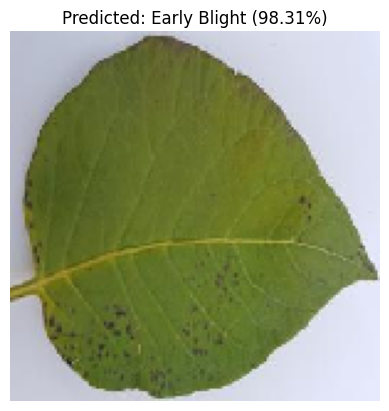

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# ✅ Confirmed class names (must match your dataset)
class_names = ['Early Blight', 'Healthy', 'Late Blight']

# ✅ Load and preprocess the image
img_path = "/content/data/PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_10.jpg"  # change to your test image path
img = image.load_img(img_path, target_size=(150, 150))  # match your model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# ✅ Predict
prediction = model.predict(img_array)
pred_index = np.argmax(prediction, axis=1)[0]   # get class index
pred_class = class_names[pred_index]
confidence = np.max(prediction) * 100

print(f"✅ Predicted: {pred_class} (Confidence: {confidence:.2f}%)")

# ✅ Visualize the image with prediction
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
✅ Predicted: Healthy (Confidence: 97.30%)


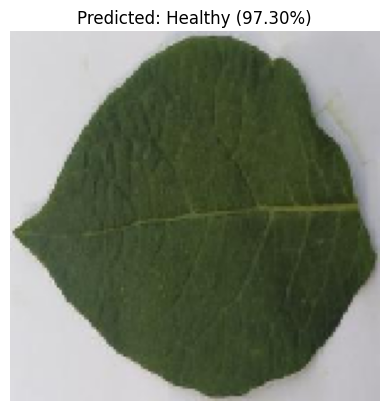

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# ✅ Confirmed class names (must match your dataset)
class_names = ['Early Blight', 'Healthy', 'Late Blight']

# ✅ Load and preprocess the image
img_path = "/content/data/PLD_3_Classes_256/Testing/Healthy/Healthy_16.jpg"  # change to your test image path
img = image.load_img(img_path, target_size=(150, 150))  # match your model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# ✅ Predict
prediction = model.predict(img_array)
pred_index = np.argmax(prediction, axis=1)[0]   # get class index
pred_class = class_names[pred_index]
confidence = np.max(prediction) * 100

print(f"✅ Predicted: {pred_class} (Confidence: {confidence:.2f}%)")

# ✅ Visualize the image with prediction
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
✅ Predicted: Late Blight (Confidence: 100.00%)


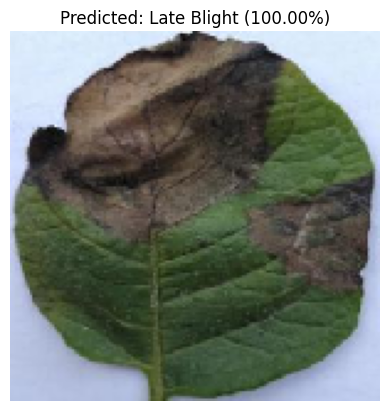

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# ✅ Confirmed class names (must match your dataset)
class_names = ['Early Blight', 'Healthy', 'Late Blight']

# ✅ Load and preprocess the image
img_path = "/content/data/PLD_3_Classes_256/Testing/Late_Blight/Late_Blight_100.jpg"  # change to your test image path
img = image.load_img(img_path, target_size=(150, 150))  # match your model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# ✅ Predict
prediction = model.predict(img_array)
pred_index = np.argmax(prediction, axis=1)[0]   # get class index
pred_class = class_names[pred_index]
confidence = np.max(prediction) * 100

print(f"✅ Predicted: {pred_class} (Confidence: {confidence:.2f}%)")

# ✅ Visualize the image with prediction
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf

# ✅ Convert the trained model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# ✅ Save the converted model
with open("potato_disease2.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ TFLite model saved as 'potato_disease2.tflite'")


Saved artifact at '/tmp/tmpbue0ksez'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_1037')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133200130184720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130187024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130182608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130188752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130180304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130179920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130182032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130187792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130187408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130187984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133200130

# **ResNet50**

In [ ]:

#Add pretrained model ResNet50

from tensorflow.keras.applications import ResNet50
base_model_resnet=ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Creating train,val and test data
train_ds_resnet=keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=64,
    shuffle=True,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)
val_ds_resnet=keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224,224),
    batch_size=64,
    shuffle=False,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)
test_ds_resnet=keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224,224),
    batch_size=64,
    shuffle=False,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)

Found 3251 files belonging to 3 classes.
Found 416 files belonging to 3 classes.
Found 405 files belonging to 3 classes.


In [ ]:
#perform Data Augmentation
data_aug_resnet=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)

])

In [ ]:

#Freeze all layers
for layer in base_model_resnet.layers:
    layer.trainable = False


#unfreeze last 40 layers
for layer in base_model_resnet.layers[-100:]:
  layer.trainable=True



inp=layers.Input(shape=(224,224,3))

x=data_aug_resnet(inp)
x=base_model_resnet(x)

#add own fully connected layers

x=GlobalAveragePooling2D()(x)
x=Dense(512,activation="relu",kernel_initializer='he_normal')(x)
x=Dropout(0.4)(x)
output=Dense(3,activation="softmax")(x)



model_resnet=Model(inp,output)

In [ ]:
model_resnet.summary()

Model: "functional_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 23,202,563 (88.51 MB)

 Non-trainable params: 1,435,776 (5.48 MB)

In [ ]:

#compile the model
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.000001)
model_resnet.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])


#apply earlystopping to reduce overfitting
early_stop_resnet=EarlyStopping(monitor="val_loss",patience=7,verbose=1,restore_best_weights=True)

In [ ]:
#fit the model
history_resnet=model_resnet.fit(train_ds_resnet,epochs=80,validation_data=test_ds_resnet,verbose=1,callbacks=[early_stop_resnet])


Epoch 1/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 63s 705ms/step - accuracy: 0.3472 - loss: 0.9248 - val_accuracy: 0.3358 - val_loss: 0.8472
Epoch 2/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 571ms/step - accuracy: 0.4250 - loss: 0.7701 - val_accuracy: 0.4099 - val_loss: 0.7107
Epoch 3/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 552ms/step - accuracy: 0.4786 - loss: 0.6774 - val_accuracy: 0.5136 - val_loss: 0.6085
Epoch 4/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 554ms/step - accuracy: 0.5232 - loss: 0.6202 - val_accuracy: 0.5926 - val_loss: 0.5393
Epoch 5/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 549ms/step - accuracy: 0.5792 - loss: 0.5591 - val_accuracy: 0.6963 - val_loss: 0.4858
Epoch 6/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 556ms/step - accuracy: 0.6401 - loss: 0.5089 - val_accuracy: 0.7679 - val_loss: 0.4429
Epoch 7/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 560ms/step - accuracy: 0.7071 - loss: 0.4738 - val_accuracy: 0.8420 - val_loss: 0.4056
Epoch 8/80
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 556ms/step - accuracy: 0.7408 - loss: 0.4336 - val_accu

In [ ]:
loss,accuracy=model_resnet.evaluate(test_ds)
print()
print()

print("Resnet model Accuracy :", accuracy*100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9777 - loss: 0.0479


Resnet model Accuracy : 97.77777791023254


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels
y_true_resnet = np.concatenate([y for x, y in test_ds_resnet], axis=0)
y_true_resnet = np.argmax(y_true_resnet, axis=1)  # one-hot → label index

# Get predicted labels
y_pred_resnet = np.argmax(model_resnet.predict(test_ds_resnet), axis=1)

# Evaluate
print("✅ Confusion Matrix of Resnet:")
print(confusion_matrix(y_true_resnet, y_pred_resnet))

print("\n✅ Classification Report of Resnet:")
print(classification_report(
    y_true_resnet, y_pred_resnet,
    target_names=['Early Blight', 'Healthy', 'Late Blight']
))

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step
✅ Confusion Matrix of Resnet:
[[160   2   0]
 [  0 102   0]
 [  0   0 141]]

✅ Classification Report of Resnet:
              precision    recall  f1-score   support

Early Blight       1.00      0.99      0.99       162
     Healthy       0.98      1.00      0.99       102
 Late Blight       1.00      1.00      1.00       141

    accuracy                           1.00       405
   macro avg       0.99      1.00      0.99       405
weighted avg       1.00      1.00      1.00       405



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
✅ Predicted: Early Blight (Confidence: 100.00%)


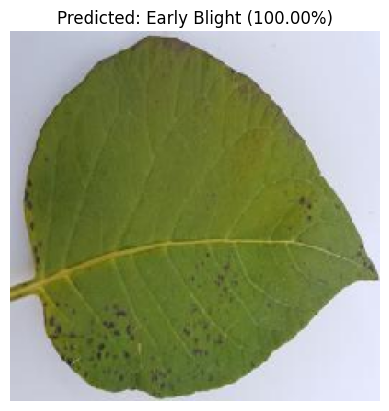

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# ✅ Confirmed class names (must match your dataset)
class_names = ['Early Blight', 'Healthy', 'Late Blight']

# ✅ Load and preprocess the image
img_path = "/content/data/PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_10.jpg"  # change to your test image path
img = image.load_img(img_path, target_size=(224, 224))  # match your model_resnet input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# ✅ Predict
prediction = model_resnet.predict(img_array)
pred_index = np.argmax(prediction, axis=1)[0]   # get class index
pred_class = class_names[pred_index]
confidence = np.max(prediction) * 100

print(f"✅ Predicted: {pred_class} (Confidence: {confidence:.2f}%)")

# ✅ Visualize the image with prediction
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
✅ Predicted: Healthy (Confidence: 98.02%)


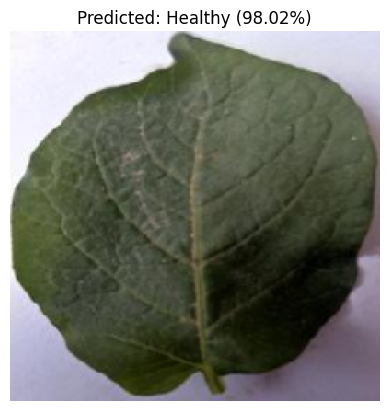

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# ✅ Confirmed class names (must match your dataset)
class_names = ['Early Blight', 'Healthy', 'Late Blight']

# ✅ Load and preprocess the image
img_path = "/content/data/PLD_3_Classes_256/Testing/Healthy/Healthy_10.jpg"  # change to your test image path
img = image.load_img(img_path, target_size=(224, 224))  # match your model_resnet input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# ✅ Predict
prediction = model_resnet.predict(img_array)
pred_index = np.argmax(prediction, axis=1)[0]   # get class index
pred_class = class_names[pred_index]
confidence = np.max(prediction) * 100

print(f"✅ Predicted: {pred_class} (Confidence: {confidence:.2f}%)")

# ✅ Visualize the image with prediction
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
✅ Predicted: Healthy (Confidence: 99.07%)


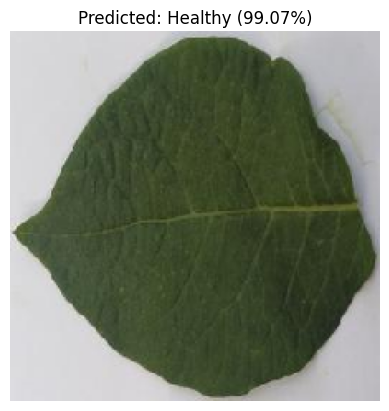

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# ✅ Confirmed class names (must match your dataset)
class_names = ['Early Blight', 'Healthy', 'Late Blight']

# ✅ Load and preprocess the image
img_path = "/content/data/PLD_3_Classes_256/Testing/Healthy/Healthy_16.jpg"  # change to your test image path
img = image.load_img(img_path, target_size=(224, 224))  # match your model_resnet input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# ✅ Predict
prediction = model_resnet.predict(img_array)
pred_index = np.argmax(prediction, axis=1)[0]   # get class index
pred_class = class_names[pred_index]
confidence = np.max(prediction) * 100

print(f"✅ Predicted: {pred_class} (Confidence: {confidence:.2f}%)")

# ✅ Visualize the image with prediction
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf

# ✅ Convert the trained model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_resnet)
tflite_model_resnet = converter.convert()

# ✅ Save the converted model
with open("potato_disease_model_resnet2.tflite", "wb") as f:
    f.write(tflite_model_resnet)

print("✅ TFLite model saved as 'potato_disease_model_resnet2.tflite'")


Saved artifact at '/tmp/tmpkxmj35_h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_1364')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133197852342224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852341264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852341072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852340880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852341456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852329360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852340112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852340688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852342608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852338576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133197852

# **EfficientNetB0**

In [ ]:
#Add pretrained model EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0
base_model_eff=EfficientNetB0(include_top=False,input_shape=(224,224,3),weights='imagenet')


#Creating train,val and test data
train_ds_eff=keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=128,
    shuffle=True,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)
val_ds_eff=keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224,224),
    batch_size=128,
    shuffle=False,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)
test_ds_eff=keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224,224),
    batch_size=128,
    shuffle=False,
    color_mode="rgb",
    label_mode="categorical",
    labels="inferred"
)
#Adding Cache , AUTOTUNE for faster training process


train_ds=train_ds.cache().shuffle(2500).prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)



#perform Data Augmentation
data_aug_eff=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)

])

#Freeze all layers
for layer in base_model_resnet.layers:
    layer.trainable = False


#unfreeze last 40 layers
for layer in base_model_resnet.layers[-70:]:
  layer.trainable=True



inp=layers.Input(shape=(224,224,3))

x=data_aug_eff(inp)
x=base_model_eff(x)

#add own fully connected layers

x=GlobalAveragePooling2D()(x)
x=Dense(512,activation="relu",kernel_initializer='he_normal')(x)
x=Dropout(0.4)(x)
output=Dense(3,activation="softmax")(x)



model_eff=Model(inp,output)


Found 3251 files belonging to 3 classes.
Found 416 files belonging to 3 classes.
Found 405 files belonging to 3 classes.


In [ ]:
model_eff.summary()

Model: "functional_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_11 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,706,982 (17.96 MB)

 Trainable params: 4,664,959 (17.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
#compile the model
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.000001)
model_eff.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])


#apply earlystopping to reduce overfitting
early_stop_eff=EarlyStopping(monitor="val_loss",patience=10,verbose=1,restore_best_weights=True)

In [ ]:
history_eff=model_eff.fit(train_ds_eff,epochs=80,validation_data=test_ds_eff,verbose=1,callbacks=[early_stop_eff])

Epoch 1/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.3513 - loss: 0.6942 - val_accuracy: 0.3531 - val_loss: 0.6952
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3829 - loss: 0.6845 - val_accuracy: 0.3827 - val_loss: 0.6875
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3942 - loss: 0.6766 - val_accuracy: 0.3926 - val_loss: 0.6782
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3987 - loss: 0.6703 - val_accuracy: 0.4543 - val_loss: 0.6658
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4384 - loss: 0.6614 - val_accuracy: 0.4938 - val_loss: 0.6523
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4321 - loss: 0.6588 - val_accuracy: 0.5259 - val_loss: 0.6394
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4628 - loss: 0.6461 - val_accuracy: 0.5679 - val_loss: 0.6277
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4589 - loss: 0.6439 - val_accuracy: 0.5827 - val_loss:

In [ ]:
loss,accuracy=model_eff.evaluate(test_ds)
print()
print()

print("EfficientNetB0 model Accuracy :", accuracy*100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.4894 - loss: 0.5985


EfficientNetB0 model Accuracy : 58.02469253540039
